# An Investigation into the Potential of 5 Unrefined vs Refined Regression Models to Predict the Price of Round-Cut Diamonds

Approximate run time: 1384.96 seconds

## Aim:
The aim of this investigation is two-fold. 

Firstly, it is to examine the potential of 5 unrefined vs refined regression models to predict the price of round-cut diamonds, and in doing so evaluate the methodology often applied when trying to selecting the best regression model to use in a given situation. Secondly, it is to create a regression model to predict the price of a round-cut diamonds that, when run on the test data, achieves a RMSE score < $530.00.

This investigastion will examine the performance of models built using the following 5 types of regression:
1. Linear regression
2. KNearest Neighbors regression - (KNeighbors regression)
3. Decision Tree regression - (DecisionTree regression)
4. Extreme Gradient Boosting regression - (XGBoost regression)
5. Histogram-based Gradient Boosting regression - (HistGBoost regression)

**Note:** The term 'unrefined' is used to describe a model that has had none of its default parameters altered in order to improve its performance - ie. the initial 'base' model.

## Background:

The 'Diamonds' dataset (released in 2007) is a well known, easily accessable dataset that contains the price, as well as 9 other attributes (see below), of 53940 round-cut diamonds sourced from the 'Loose Diamonds Search Engine'. Since its release, it has become a popular 'practice' dataset for those seeking to hone their machine-learning and data-analyses skills. It is most often used to practice data cleaning and preprocessing, as well as regression modelling, with hundreds of *"Predicting the Price of Diamonds using Regression"* notebooks having been created and uploaded to sites such as Kaggle over the years. 

As a general rule, most of these *"Predicting the Price of Diamonds using Regression"* notebooks examine (using some form of cross validation) the potential of several different unrefined regression models to predict the price of diamonds within the dataset. They then select the best performing model, refine it (although not always), and then use it as the final model. The 5 most popular unrefined regression models examined within these notebooks, along with representative ranges of the Negative RMSE score achieved by each during cross validation, are shown below.

- **Linear regression Neg_RMSE:** \\$1260.0 - \\$1390.0
- **KNeighbors regression Neg_RMSE:** \\$810.0 - \\$830.0
- **DecisionTree regression Neg_RMSE:** \\$740.0 - \\$765.0
- **RandomForest regression Neg_RMSE:** \\$540.0 - \\$560.0
- **XGBoost regression Neg_RMSE:** \\$535.0 - \\$550.0

Given the high performance of unrefined RandomForest models and XGBoost models relative to that of unrefined Linear, Kneighbors and DecisionTree models, refined versions of either one of these models (ie. RandomForest and XGBoost) is generally used as the final model. Interestingly, the refined version of both a RandomForest and a XGBoost model is often only able to achieve a small improvement in performance over the unrefined version of the same model - usually, the refined model's Neg_RMSE is still greater than 0.96 x unrefined model's Neg_RMSE. However, the same is rarely true of models built using any one of the other three types of regression mentioned. For instance, a model built using Linear regression can often achieve significant improvements in performance when polynomial feature transformation is applied; or in the case of a KNeighbors regression model, when the number of neighbors is altered, or only certain features used to predict the target, etc. This being so, it begs the question:

If the performance of the unrefined and refined versions of certain regression models is almost equivalent, while the performance of the unrefined and refined versions of others kinds of regression models differs greatly, ought one to use the performance of unrefined regression models to gauge which is the best model to use in a given situation?

In addition to creating a regression model that achieves a RMSE score < $530 when run on the test data, the above question is one I hope this investigation will go some way in answering.

**Note:** A RandomForest regression model will not be examined in this investigation. Instead, a HistGBoost regression model will be examined. The reason for this is because of the amount of time and processing power needed to refine a RandomForest model relative to a HistGBoost model, and because like RandomForest models, the performance of an unrefined HistGBoost model is generally very close to that of a refined one. In addition to this, I have yet to see a HistGBoost model used in the context of the 'Diamonds' dataset, and am interested to see how it will measure up.

## Summary:

The investigation was able to demonstrate that using the performance of unrefined regression models as the selection criteria for choosing which regression model ought to be further refined and used as the final model in a given situation, is by no means a foolproof way of ensuring the best model ends up being selected. The reason for this is primarily due to the fact that the performance of the unrefined and refined versions of certain regression models (such as XGBoost and HistGBoost) is extremely similar, whilst the performance of the unrefined and refined versions of other types of regression models (such as Linear, KNeighbors and DecisionTree models) is often vastly different. Thus, there is no way of knowing whether the performance of, for instance, a refined KNeighbors model will exceed that of a model such as XGBoost (or any other model for that matter) when all there is to go on is the performance of the unrefined models. A much better approach it would seem, is to partially refine all the potential regression models that could be used within a given situation, and then use the performance of these partialy refined models as the criteria for selecting the best model to use - (Note: This approach still requires further investigation). 

As for predicting the price of round-cut diamonds: 

53696 out of the original 53940 diamonds were used (99.55% of dataset), along with a train to test split of 75:25. A refined XGBoost model was used as the final model and when used to predit the price of the diamonds in the test data set was able to achieve a RMSE score of \\$504.05 a full \\$25.95 better than the original target of \\$530.00. The models adjusted R^2 score was 0.9837.

## The 'Diamonds' Dataset Variables (as reported in its documentation):

- **price** - price in US dollars (\\$326--\\$18,823)
- **carat** - weight of the diamond (0.2--5.01)
- **cut** - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- **color** - diamond colour, from J (worst) to D (best)
- **clarity** - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- **x** - length in mm (0--10.74)
- **y** - width in mm (0--58.9)
- **z** - depth in mm (0--31.8)
- **depth** - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- **table** - width of top of diamond relative to widest point (43--95)

## Imports

In [3]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from time import time

## Load Data

In [4]:
diam_df = pd.read_csv('diamonds.csv')

In [5]:
diam_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##  Diamond Target and Features Description
**Note:** Much of what is contained in the descriptions below has been condensed from information found on the 'PetraGems' website(https://www.petragems.com), the International Gem Society Website(https://www.gemsociety.org/article/diamond-measurements/) and the pdf 'Estimating a Cut Grade Using the GIA Diamond Cut Grading System' published by the Gemological Institute of America(https://www.gia.edu/doc/estimating_cut_grade_chart_lowres.pdf)

### Target

**price (\\$326--\\$18,823):** The price in US dollars of a diamond.

### Features

**carat (0.2--5.01):** The unit used to describe the weight of a diamond (1 carat = 200mg). Carat, along with Cut, Clarity and Color, make up the 4C's of diamonds - the 4 most commonly used terms to describe/classify diamonds. Carat has a big hand in determining the value of a diamond.

**cut (Ideal (best), Premium, Very Good, Good, Fair (worst)):** An ordered categorical feature used to describe how well a diamond, once cut, is able to interact with light to produce the characteristic 'sparkle' and 'light-play' that make diamonds so visually appealing - it is one of the measures of a diamond's beauty. The quality/grade of a diamond's cut is most often determined by comparing certain measurable features of a diamond (such as diameter, table, culet, depth, etc - see figure below for reference) against globally accepted specifications. In general, these specifications outline ranges within which the measurable features of a diamond (with a given shape) ought to fall to be classified as having a certain cut grade.

<img src=https://admin.petragems.com/api/Images/Picture64.jpg width=450>

**color (D (best), E, F, G, H, I, J (worst)):**  An ordered categorical feature used to describe the colour of a diamond. The letters D through Z are used to designate different colours - see figure below. The diamonds dataset contains diamonds with colours D through J, meaning it contains only colourless to near colourless diamonds. Diamonds with colours D, E and F are deemed as being colourless diamonds with D being the best, whilst diamonds with colours G, H, I and J are deemed as being near colourless diamonds with J being the worst.

<img src=https://admin.petragems.com/api/Images/Picture63.jpg width=650>

**clarity (IF (best), VVS1, VVS2, VS1, VS2, SI1, SI2, I1 (worst)):** An ordered categorical feature used to describe how clear a diamond is - i.e. how free it is of clarity reducing inclusions (internal defects) and blemishes (external flaws). A visual can be found at - https://admin.petragems.com/api/Images/Picture58.jpg

**x (0--10.74):** The length of the diamond in mm. 

**y (0--58.9):** The width of the diamond in mm.

**z (0--31.8):** The depth of the diamond in mm. (Note: A diamond's depth is always smaller than both its length and width - i.e. **z < min(x, y)**).

**depth (43--79):** Total depth percentage of the diamond = z * 100% / mean(x, y) = 2 * z * 100% / (x + y). It is one of the measures used to help ascertain the cut of a diamond. 

The Gemological Institute of America specifies the following cut grade depth percent ranges for round-cut diamonds.

- Excellent to Poor: 57.5% to 63.0%
- Very Good to Poor: 56.0% to 64.5%
- Good to Poor: 53.0% to 66.5%
- Fair to Poor: 51.9% to 70.9%
- Poor: <51.9% to >70.9%

From the above, we can infer that the further away the depth percentage of a diamond is from the 60.0%, the more likely it is to have a lower cut grade.

**table (43--95):** Table percentage - refers to the width of the top of a diamond relative to its widest point (%). It is one of the measures used to help ascertain the cut of a diamond. The Gemological Institute of America specifies the following cut grade table percente ranges for round-cut diamonds.

- Excellent to Poor: 52% to 62%
- Very Good to Poor: 50% to 66%
- Good to Poor: 47% to 69%
- Fair to Poor: 44% to 72%
- Poor: <44% to >72%

From the above, we can infer that the further away the table percentage of a diamond is from 57%, the more likely it is to have a lower cut grade.

### An Additional Feature that I will as a result of performing my own research:

**l_w_ratio:** The length to width ratio of a diamond. It is calculated by dividing a diamond's length by its width. It describes a diamond's proportions/shape. For round-cut diamond, the optimum length to width ratio is 1.00 - i.e. a diamond whose length is the same as its width. In general, the further away from 1.00 a round-cut diamonds length to width ratio is, the less likely it will be to obtain a high cut grade, and the lower it's price will be.

## Initial Data Cleaning (deal with all illogical, null and duplicate values)

In [6]:
# Make a copy of our dataframe that we can 'clean'
df = diam_df.copy()

In [7]:
# Add the feature 'l_w_ratio' to the dataset
df['l_w_ratio'] = round(df.x / df.y,3)

### Illogical Values (values that fall outside the parameters specified, or which make no sense):
**Categorical features:**

In [8]:
# Function to check the labels of a given categorical feature in our dataset
def check_labels(dataframe, column, reference_labels):
    
    if set(list(dataframe[column].unique())).issubset(set(reference_labels)):
        print(f"{column} passed.")
    else:
        print(f"{column} failed.")

In [9]:
# Check 'cut' labels
check_labels(df, 'cut', ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

cut passed.


In [10]:
# Check 'color' labels
check_labels(df, 'color', ['D', 'E', 'F', 'G', 'H', 'I', 'J'])

color passed.


In [11]:
# Check 'clarity' labels
check_labels(df, 'clarity', ['I1' , 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])

clarity passed.


**Numerical Features:**

In [12]:
# Get dataset description
df.describe()

,carat,depth,table,price,x,y,z,l_w_ratio
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53933.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734,0.999408
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699,0.012442
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000,0.993000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,0.996000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000,1.007000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,1.616000


From the above table, we can confirm that all the original numeric features of the dataset fall within the ranges specified for them. However, on closer inspection, it's obvious there are several values in the above table that don't make sense.

**Problem 1:** How can a diamond have any of its dimensions (**x**, **y** or **z**) be equal to zero?

**Problem 2:** If a round-cut diamond's depth(**z**) is always meant to be smaller than its length(**x**) and width(**y**), why is the max depth(**z**) (31.80mm) greater than the max length(**x**) (10.74mm)?

**Problem 3:** Why is the **l_w_ratio** column's count value (53933) less that the count value of all the other columns(53940)?

**Solution to Problem 1:** 

Let's first determine how many diamonds have dimensions reported as being equal to zero.

In [13]:
print("Number of diamonds with at least one dimension (x, y or z) reported as being equal to zero:", end=" ") 
print(f"{df[(df.x == 0) | (df.y == 0) | (df.z == 0)].shape[0]}")

Number of diamonds with at least one dimension (x, y or z) reported as being equal to zero: 20


In [14]:
# return the dimensions of the 20 diamonds with at least one dimension reported as equal to zero
df[(df.x == 0) | (df.y == 0) | (df.z == 0)][['x', 'y', 'z']].transpose()

,2207,2314,4791,5471,10167,11182,11963,13601,15951,24394,24520,26123,26243,27112,27429,27503,27739,49556,49557,51506
x,6.55,6.66,6.50,6.50,7.15,0.00,0.0,6.88,0.0,8.49,0.0,8.52,0.0,8.42,0.0,8.02,8.90,0.0,0.0,6.71
y,6.48,6.60,6.47,6.47,7.04,6.62,0.0,6.83,0.0,8.45,0.0,8.42,0.0,8.37,0.0,7.95,8.85,0.0,0.0,6.67
z,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00


There are only 20 diamonds with one or more dimensions reported as being equal to zero, 8 of which report all 3 dimensions (**x**, **y** and **z**) as being equal to zero, and the other 12 reporting only the depth(**z**) as being equal to zero. 20 is a small number relative to the total number of diamonds in the dataset (50,000+) and thus we will simply drop these 20 diamonds from the dataset.

In [15]:
df = df.drop(df[(df.x == 0) | (df.y == 0) | (df.z == 0)].index, axis=0)

**Solution to Problem 2:** 

Let's first determine how many diamonds violate the depth(**z**) dimensionality rule for round-cut diamonds - i.e. **z < min(x, y)**.

In [16]:
print(f"Number of diamonds with a z >= min(x, y): {df[(df.z >= df.x) | (df.z >= df.y)].shape[0]}")

Number of diamonds with a z >= min(x, y): 2


Only 2 diamonds appear to have a **z >= min(x, y)**. Lets take a closer look at them.

In [17]:
df[(df.z > df.x) | (df.z > df.y)]

,carat,cut,color,clarity,depth,table,price,x,y,z,l_w_ratio
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,0.994
49905,0.50,Very Good,G,VVS1,63.7,58.0,2180,5.01,5.04,5.06,0.994


For the 2 diamonds above, an incorrect depth(**z**) value appears to have been assigned in both cases. This is supported by the fact that the depth percentage(**depth**) reported for both diamonds does not correspond to the the depth percentage calculated when using the reported depth(**z**):

- Diamond at index 48410: (2 * 100% * 31.80) / (5.12 + 5.15) = 619% 
- Diamond at index 49905: (2 * 100% * 5.06) / (5.01 + 5.04) = 101%

The fact that the reported depth percentage(**depth**) does not match the one calculated when using the reported dimensions (**x**, **y** and **z**) is of great interest to us as it provides us with a means to identify other diamonds whose dimensions (**x**, **y** and **z**) or depth percentage(**depth**) have been reported wrongly (as in the case above). 

Let's recalculate the depth percentage of all the diamonds in our dataset and store it in a new column called **'calculated_depth'**.

In [18]:
df['calculated_depth'] = round((200 * df.z / (df.x + df.y)), 1)

Let's plot the reported depth percentage (**depth**) against the newly calculated depth percentage (**calculated_depth**) to see how well they match up.

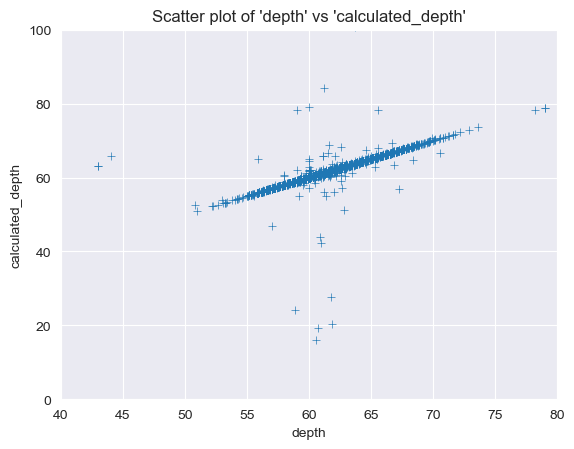

In [19]:
sns.scatterplot(df, x='depth', y='calculated_depth', marker='+')
plt.xlim((40,80))
plt.ylim((0,100))
plt.title("Scatter plot of 'depth' vs 'calculated_depth'");

It's clear from the above scatterplot that there are a number of diamonds in our dataset that have incorrect values assigned to either their **x, y , z** or **depth** features. Unfortunately, it's impossible to say with certainty just which of these 4 features contains the incorrectly reported value, and so (provided there aren't too many of them) it makes sense to simply remove the worst offenders from our dataset.

Let's remove every diamond from out dataset whose reported depth percentage(**depth**) isn't within 1.0% of the newly calculated depth percentage(**calculated_depth**).

In [20]:
depth_variability_limit = 1.0
print(f"Number of diamonds whose calculated and reported depth differ by more than {depth_variability_limit}%:", end=" ")
print(f"{df[(abs(df.depth - df.calculated_depth) > depth_variability_limit)].shape[0]}")

Number of diamonds whose calculated and reported depth differ by more than 1.0%: 72


In [21]:
df = df.drop(df[(abs(df.depth - df.calculated_depth) > depth_variability_limit)].index, axis=0)

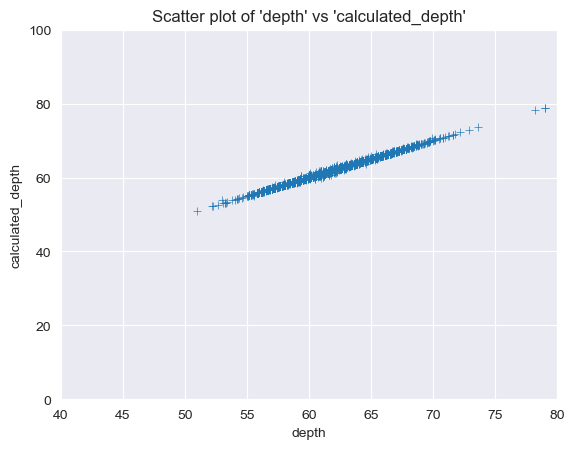

In [22]:
# Replot the reported depth percentage('depth') against the newly calculated depth percentage('calc_depth')
sns.scatterplot(df, x='depth', y='calculated_depth', marker='+')
plt.xlim(40,80)
plt.ylim(0,100)
plt.title("Scatter plot of 'depth' vs 'calculated_depth'");

That's a lot better. Let's finish by dropping the **calculated_depth** column we created from our dataset

In [23]:
df = df.drop('calculated_depth', axis=1)

**Solution to Problem 3:**

So it's likely that we've already solved Problem 3 by solving Problems 1 and 2, as anything divided by zero will result in a null value being returned. Let's check to see if we've already managed to solve Problem 3.

In [24]:
df.describe().head(1)

,carat,depth,table,price,x,y,z,l_w_ratio
count,53848.0,53848.0,53848.0,53848.0,53848.0,53848.0,53848.0,53848.0


The count value is now the same across all columns, meaning we did indeed manage to solve Problem 3 by solving Problems 1 and 2.

### Null Values

In [25]:
# Check for null values
df.isnull().values.any()

False

### Duplicates

In [26]:
# Check for duplicate values
df.duplicated().value_counts()

False    53703
True       145
Name: count, dtype: int64

Let's drop all duplicates from our dataset.

In [27]:
df = df.drop_duplicates()

#### Size of our Dataset after Initial Data Cleaning:

In [28]:
print(f"Number of diamonds removed: {diam_df.shape[0] - df.shape[0]}")
print(f"Current number of diamonds in dataset: {df.shape[0]}")
print(f"Size of current dataset relative to original dataset: {round(100 * df.shape[0] / diam_df.shape[0], 2)}%")

Number of diamonds removed: 237
Current number of diamonds in dataset: 53703
Size of current dataset relative to original dataset: 99.56%


## Exploratory Data Analysis and Preprocessing

In [29]:
# Make a copy of our dataframe to use for our EDA and further Preprocessing
df_eda = df.copy()

Let's check to see how closely correlated the features within our dataset are to one another.

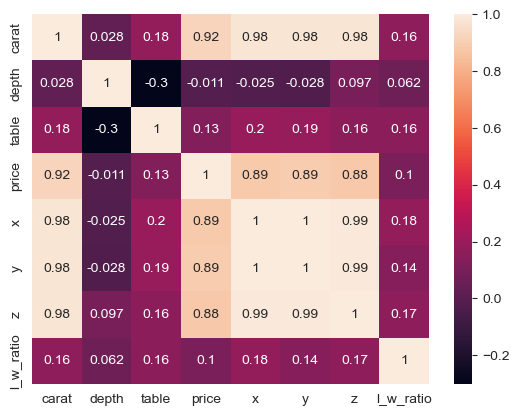

In [30]:
sns.heatmap(df_eda.corr(numeric_only=True), annot=True, fmt='.2g');

From the above figure, we can see that the **price** of a diamond is closely correlated to the features;  **carat**, **x**, **y** and **z**. Taking a closer look at these 4 features, we can see that they too are all closely correlated to one another, not least the features **x**, **y** and **z**. The features **depth**, **table** and **l_w_ratio** are not closely correlated with the price of a diamond.

**Note**: Multi-colinearity isn't going to be considered in this analysis - we are more interested in creating a model with high predictive power than we are in determining the effect that each feature has on the price of a diamond.

#### Pairplot

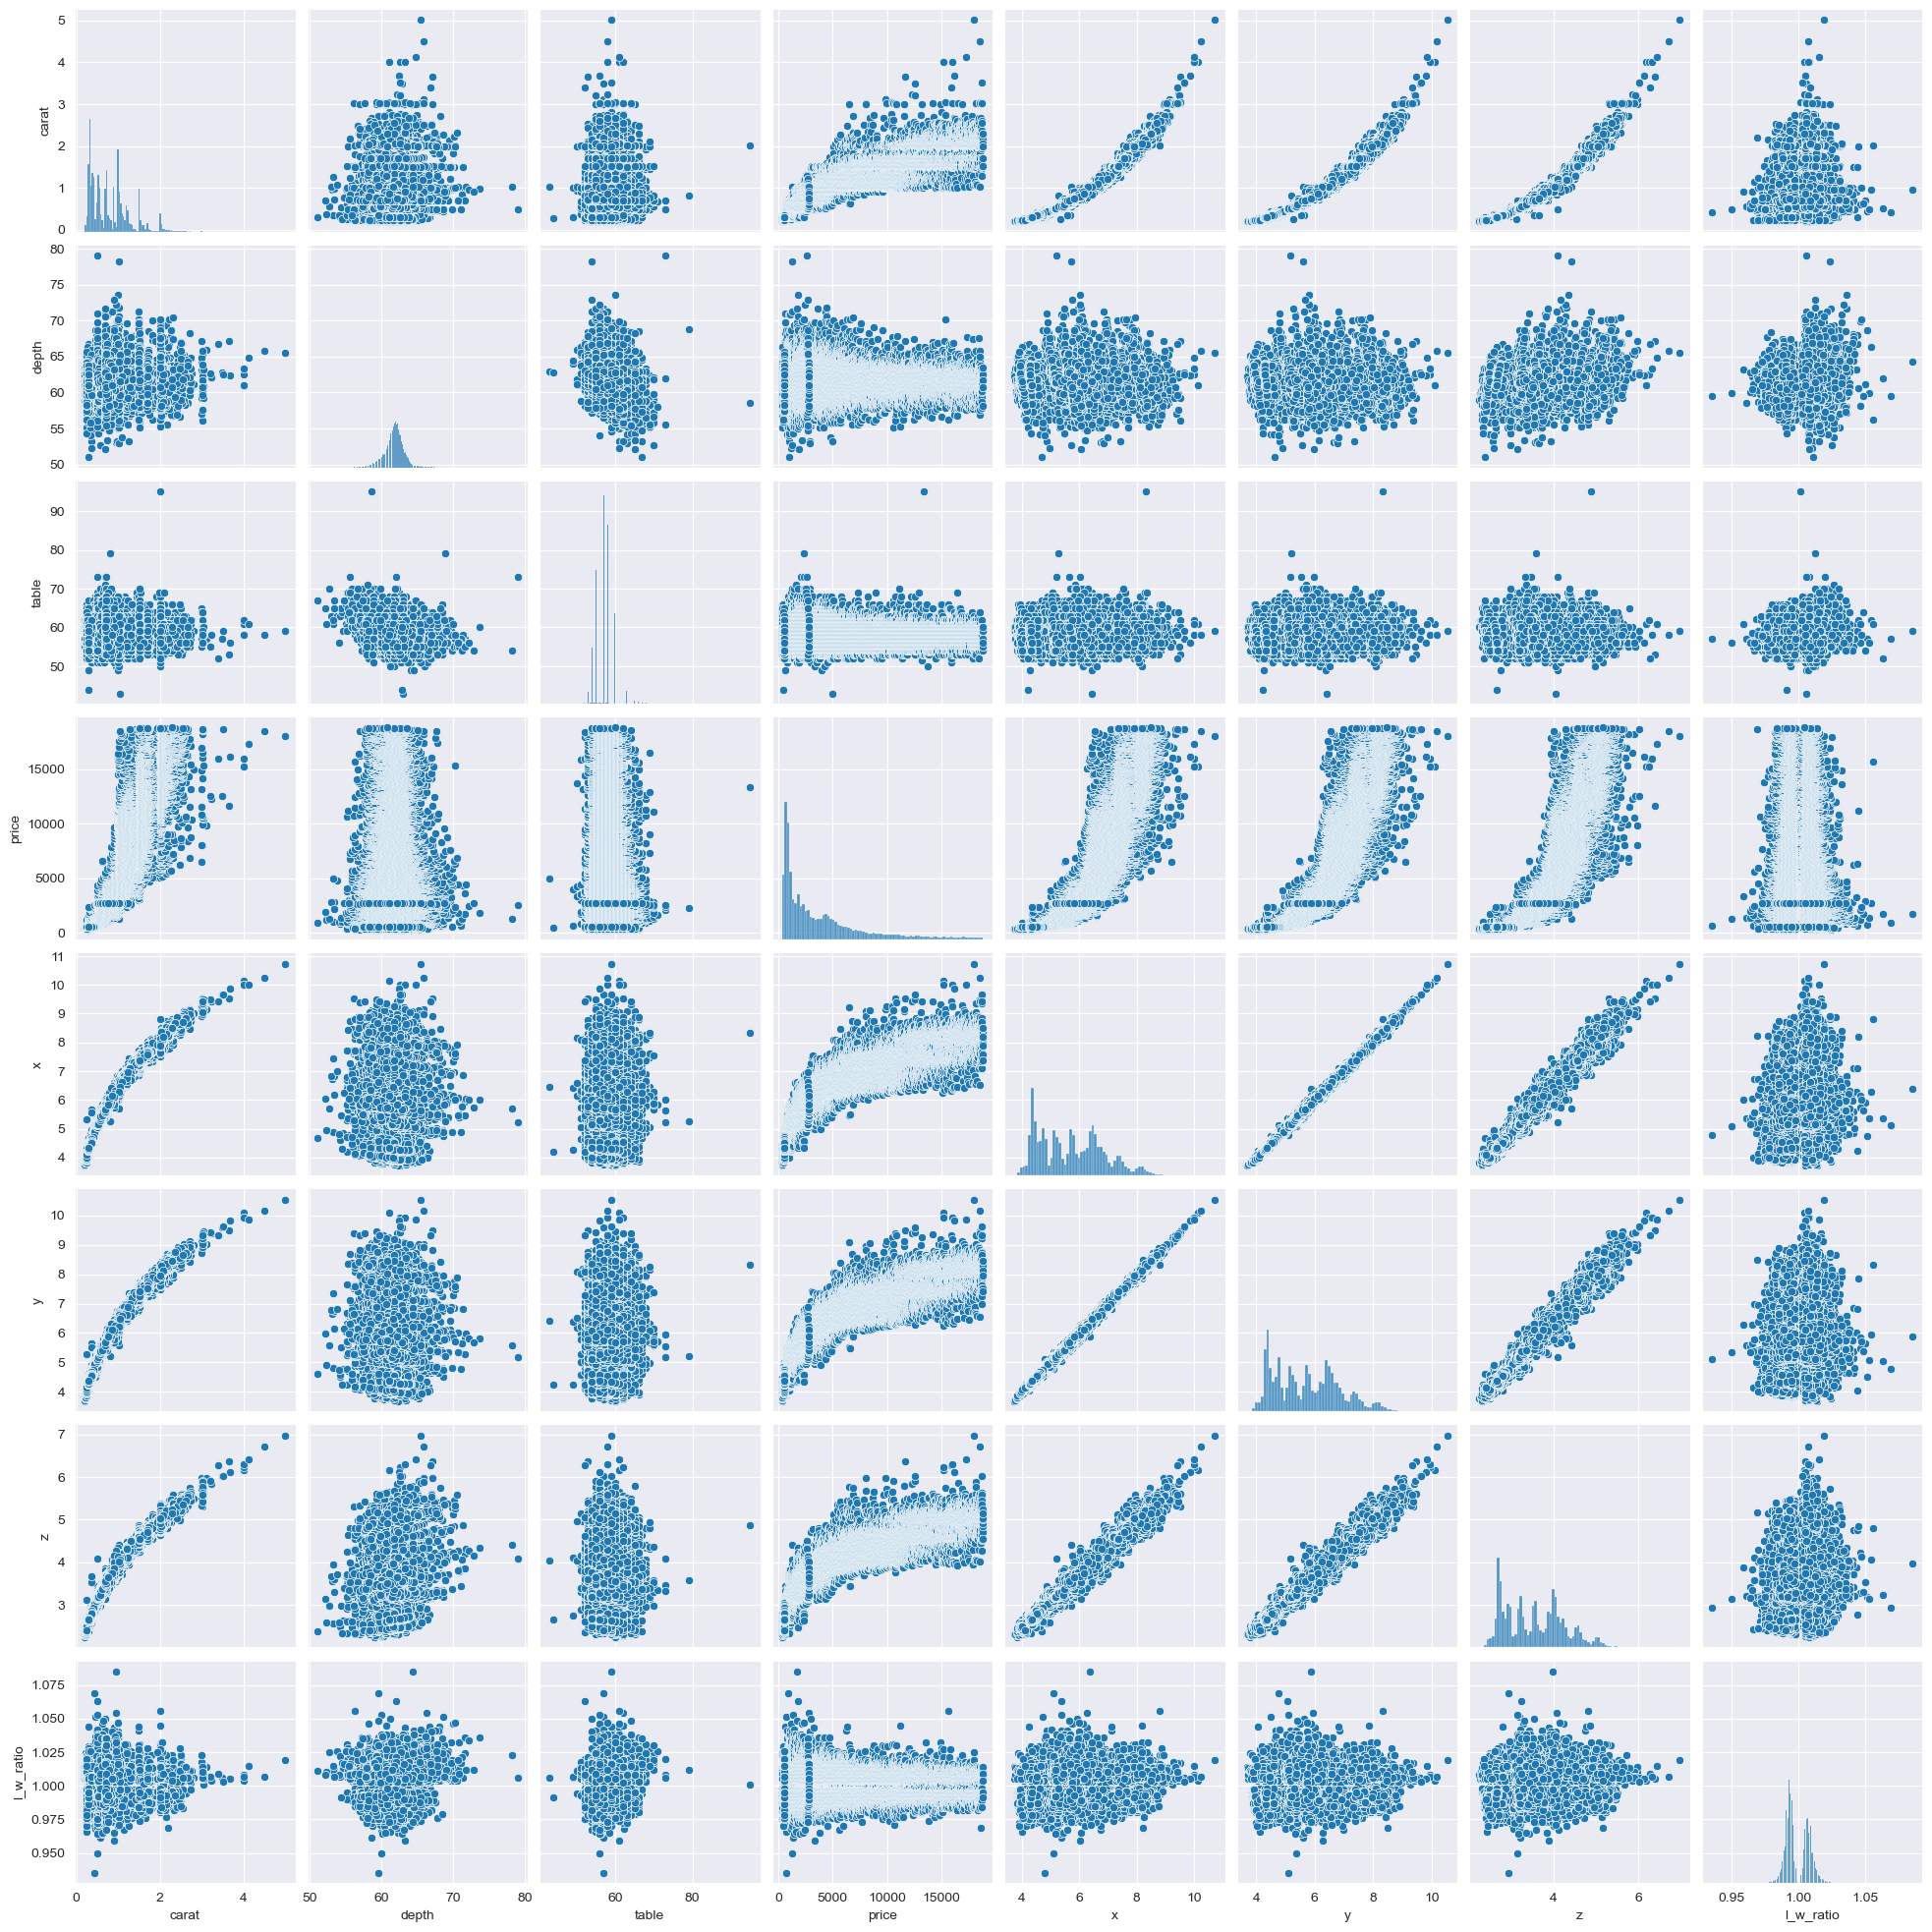

In [31]:
sns.pairplot(df_eda);

From the above plot, it appears that our dataset still contains several outliers. Let's examine each feature individually, as well as remove any outliers.

### Target
#### price: 

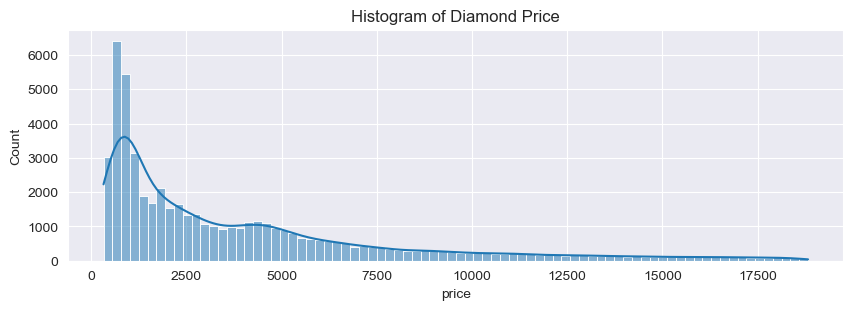

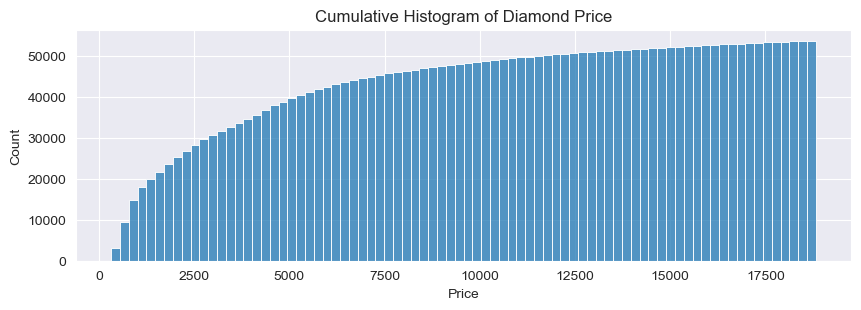

In [32]:
plt.figure(figsize=(10,3))
sns.histplot(df_eda, x='price', kde=True)
plt.title('Histogram of Diamond Price');

plt.figure(figsize=(10,3))
sns.histplot(df_eda, x='price', cumulative=True)
plt.title('Cumulative Histogram of Diamond Price')
plt.ylabel('Count')
plt.xlabel('Price');

It appears that the price of diamonds in our dataset follows a right skewed distribution, with the majority of diamonds costing less than $2500. This may result in the model we create being able to more accurately predict the price of less expensive diamonds than expensive ones.

### Numeric Features
#### Dimensions x, y and z:

Let's take a closer look at the features **x**, **y** and **z** to see whether they contain any outliers.

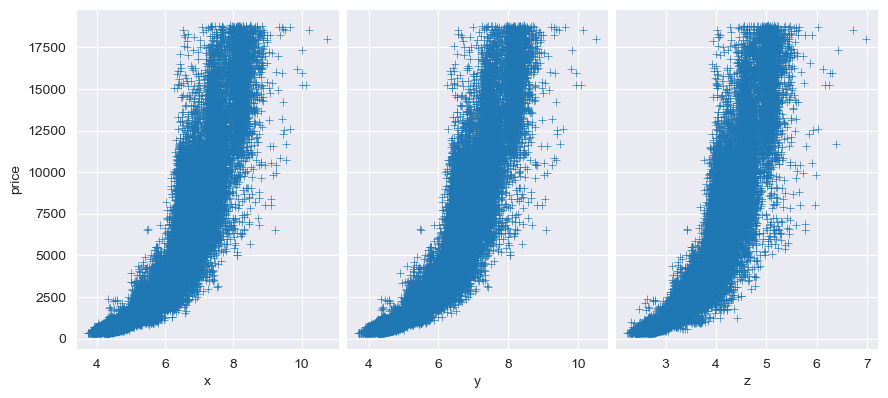

In [33]:
sns.pairplot(df_eda, y_vars='price', x_vars=['x', 'y', 'z'], height=4.0, markers='+', aspect= 0.75);

From the above plots, it appears like neither **x**, **y** or **z** contain any obvious outliers. It's also clear that the general trend is for the price of a diamond to increase exponentially as any one of these 3 features increases linearly.

#### carat:

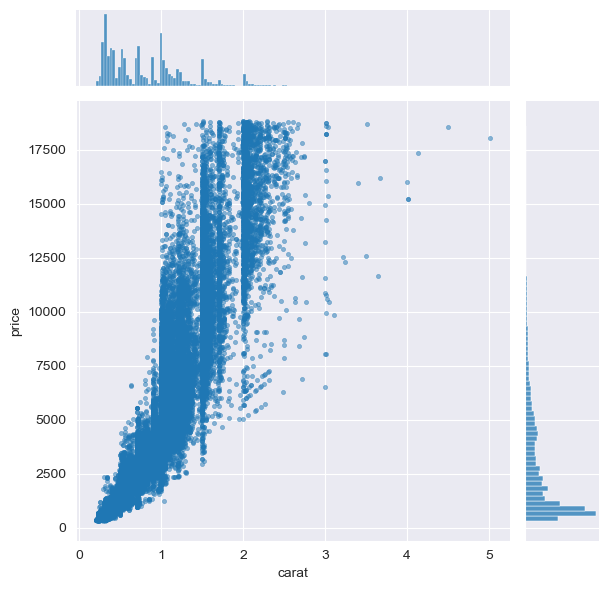

In [34]:
sns.jointplot(df_eda, x='carat', y='price', marker='.', alpha=0.5, edgecolor=None);

From the above figure, it's clear there are very few diamonds with a weight of 3.00 or more carats. It's also clear that, in general, the price of a diamond increase exponentially as its weight increases linearly. In terms of outliers, we could remove every diamonds with a weight >= 3.00 carats from our dataset if we wanted to. Personally though, I believe there's enough of them, and that they are spread out in a favourable enough manner to justify keeping them in the dataset.

#### depth:

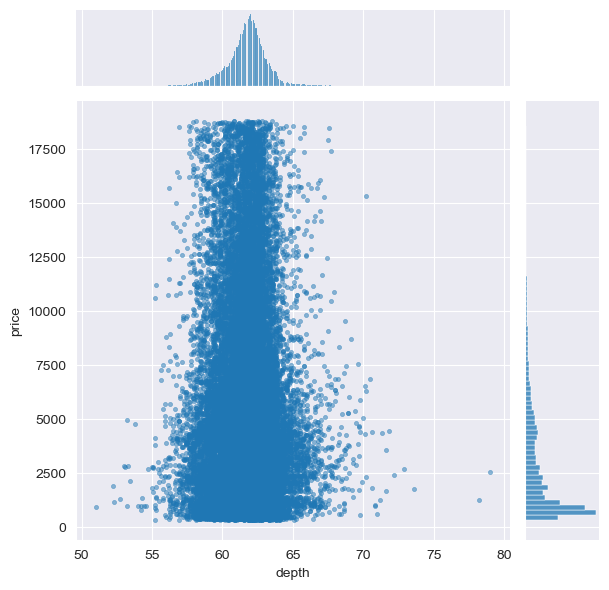

In [35]:
sns.jointplot(df_eda, x='depth', y='price', marker=".", alpha=0.5, edgecolor=None);

At a glance, it may appear (from the above figure) that the **depth** percentage of a diamond has little impact on its **price** (Note: that said, diamonds with a depth percentage in the range 57.5% - 63.0% do appear more likely to fetch a higher price than those that fall outside of this range). The above figure, however, does not take into account the effect of features such as the weight of a diamond, and thus presents a deceptive idea of the relationship between the **depth** percentage of a diamond and its **price**. Let's add a temporary column called **price_adj** to our dataset and equate it to the price of a diamond divided by its carat weight (the most strongly correlated feature to price). Lets then replot the above figure using the adjusted price, and this time set the hue = **cut** so that we can see the relationship between a diamonds cut grade and its depth percentage. Hopefully, this will provide us with a much better representation of the relationship between a diamond's price and its depth percentage.

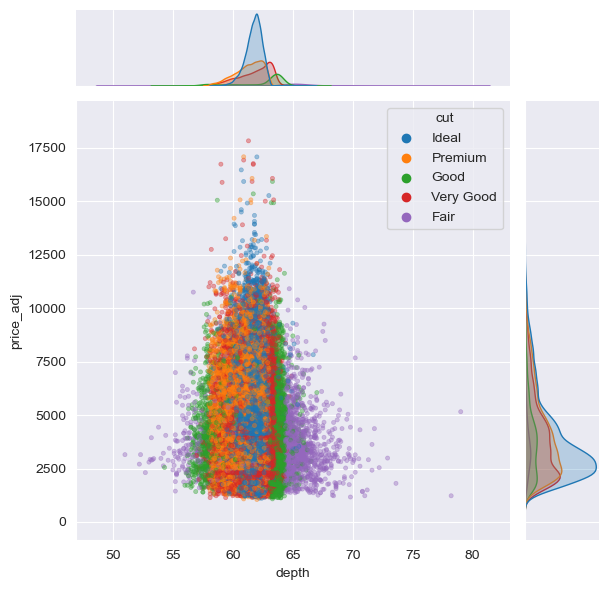

In [36]:
df_eda['price_adj'] = df_eda.price / df_eda.carat
sns.jointplot(df_eda, x='depth', y='price_adj', marker=".", hue='cut', alpha=0.4, edgecolor=None);

From the above plot, we can see that there is indeed a relationship between the **depth** percentage of a diamond and its **price** - instead of the column like plot we saw before, the plot above has a much more pyramidal/triangular shape. There appears to be a peak in the price of diamonds with a depth percentage of around 61%-62%. From the above plot we can also cleary see the relationship that exists between the **cut** grade and the **depth** percentage of a diamond, with certain cut grades falling predominantly within certain depth percent ranges - as was detailed in the feature description.

What's also obvious from the above plot is that there's outliers within the **depth** feature. Let's exclude all diamonds from our dataset that have a depth percentage >75.0%.

Let's save the index numbers of all diamonds that have a depth percentage > 75.0% to a list so that we can remove them from our dataset later.

In [37]:
depth_outliers = list(df_eda[df_eda.depth > 75.0].index)

#### table:

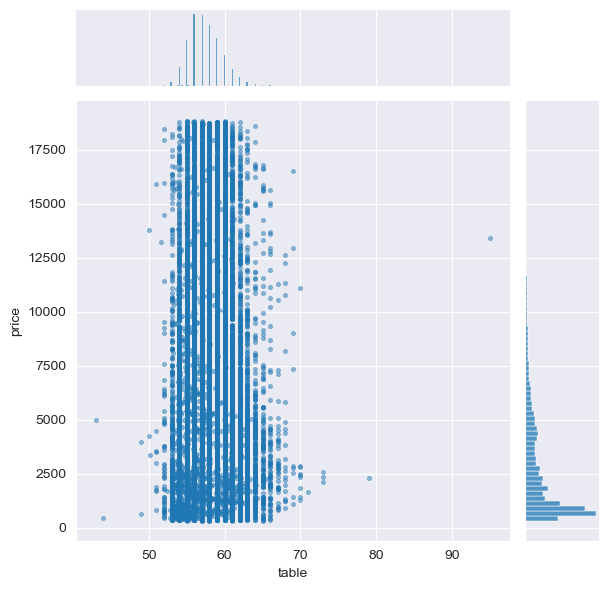

In [38]:
sns.jointplot(df_eda, x='table', y='price', marker=".", alpha=0.5, edgecolor=None);

As with the **depth** percentage, the **table** percentage appears to have little to no relationship to the **price** of a diamond. Let's do the same thing here as we did with the **depth** percentage earlier and replot **table** against the adjusted price (**price_adj**), setting the hue = **cut**.

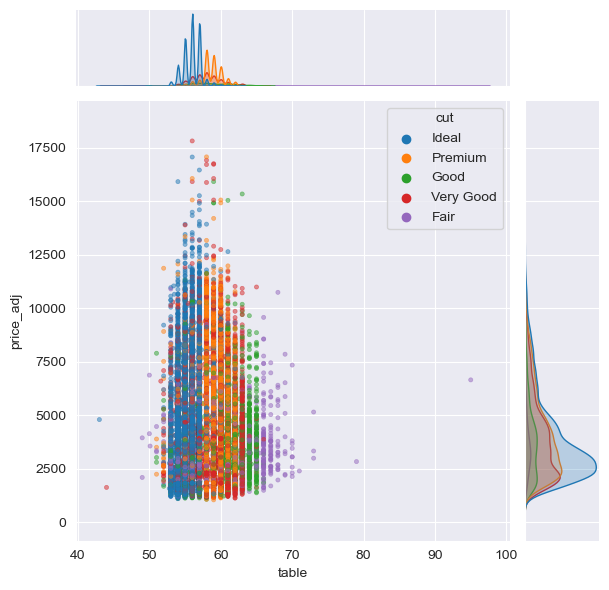

In [39]:
sns.jointplot(df_eda, x='table', y='price_adj', marker=".", hue='cut', alpha=0.5, edgecolor=None);

The above plot is certainly less column like than the plot before, although it could hardly be called triangular. There does appear to be a relationship between **cut** and **table** in the above plot, although the density of the plot makes it difficult to accurately assess. As discussed in the feature description, the most expensive diamonds do appear to be the ones with a table percentage closer to 57%, with an apparent drop off in diamond price the further away from 57% one goes. 

It's clear from the above plot that there is an outlier within the **table** feature. Lets remove all diamonds in our dataset with a table percentage > 80.0%

Let's save the index numbers of all diamonds that have a table percentage > 80.0% to a list so that we can remove them from our dataset later.

In [40]:
table_outliers = list(df_eda[df_eda.table > 80.0].index)

#### l_w_ratio:

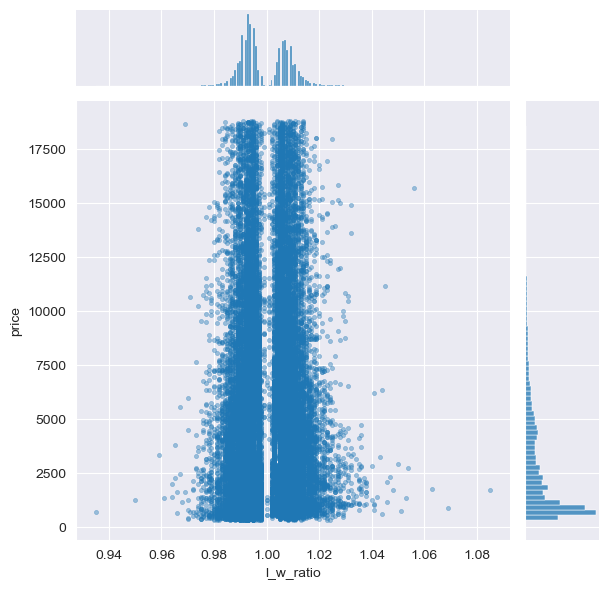

In [41]:
sns.jointplot(df_eda, x='l_w_ratio', y='price', marker=".", alpha=0.4, edgecolor=None);

From the above plot, there does seem to be slight relationship between the **l_w_ratio** and **price** of a diamond. This is seen in the slight narrowing of the two columns above as they approach a l_w_ratio value of 1.00. Lets do the same thing we did with both **depth** and **table** and plot the **l_w_ratio** against the adjusted price (**price_adj**), setting hue= **cut**.

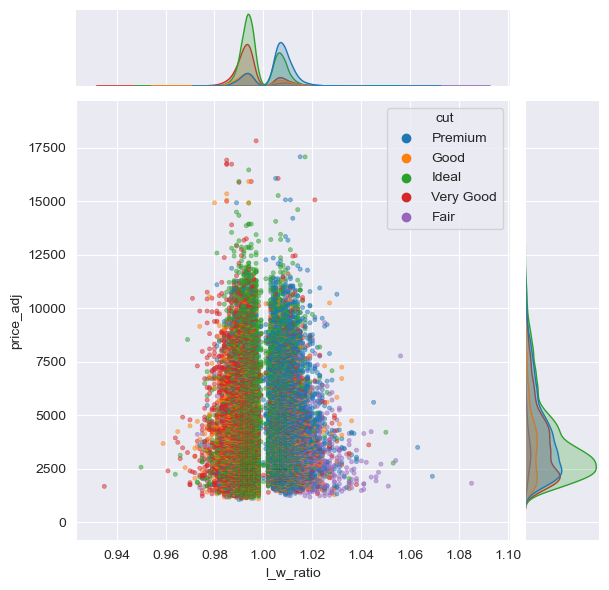

In [92]:
sns.jointplot(df_eda.sort_values('price_adj'), x='l_w_ratio', y='price_adj', marker=".", hue='cut', alpha=0.5, edgecolor=None);

The relationship between the **l_w_ratio** and the **price** of a diamond is much easier to see in the plot above than in the one before it, with diamonds having a l_w_ratio close to 1.00 appearing more likely to fetch a higher price than those with a l_w_ratio further away from 1.00. Interestingly, there doesn't appears to be a clear cut relationship between the **cut** of a diamond and its **l_w_ratio**, although the sheer density of the plot makes it difficult accuratel assess. As for outliers, lets remove all diamonds from our dataset that have a **l_w_ratio** <0.94 or >1.06. 

Lets save the index numbers of all diamonds that have a l_w_ratio <0.94 or >1.06 to a list so that we can remove them from our dataset later.

In [43]:
l_w_ratio_outliers = list(df_eda[(df_eda.l_w_ratio >1.06) | (df_eda.l_w_ratio< 0.94)].index)

In [44]:
# Lets drop 'price_adj' column from our dataset
df_eda = df_eda.drop('price_adj', axis=1)

### Categorical Data

#### cut:

cut
Ideal        21468
Premium      13701
Very Good    12063
Good          4887
Fair          1584
Name: count, dtype: int64

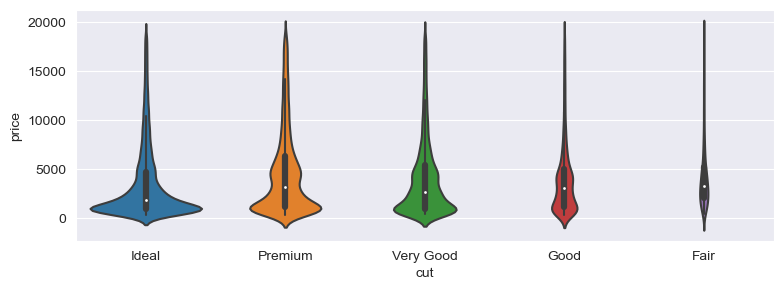

In [45]:
plt.figure(figsize=(9,3))
sns.violinplot(df_eda, x='cut', y='price', order=['Ideal', 'Premium', 'Very Good','Good' ,'Fair'], scale='count');

df_eda['cut'].value_counts()

From the above, we can see that our dataset doesn't contain an equal number of diamonds per **cut** grade. This may result in the model we create being better at predicting the price of diamonds with a certain cut grade than others. Interestingly, the price of 'Fair' cut diamonds appears (on average) to be more than the price of 'Ideal' cut diamonds. This is likely due to the fact that the average weight of 'Fair' cut diamonds in our dataset is greater than that of 'Ideal' cut diamonds. Lets check to see whether this is true.

In [46]:
df_eda.groupby('cut')[['carat', 'price']].mean()

,carat,price
cut,,
Fair,1.042134,4323.368056
Good,0.846814,3916.913444
Ideal,0.703302,3461.593441
Premium,0.890677,4576.236698
Very Good,0.806217,3981.447401


As we suspected, the average weight of 'Fair' cut diamonds is greater than the average weight of 'Ideal' cut diamonds.

#### color:

color
D     6751
E     9761
F     9507
G    11237
H     8246
I     5403
J     2798
Name: count, dtype: int64

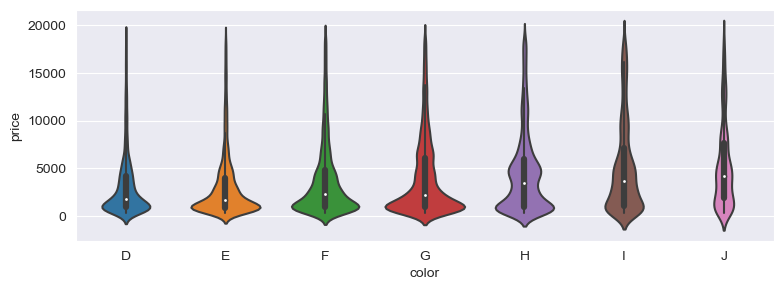

In [47]:
plt.figure(figsize=(9,3))
sns.violinplot(df_eda, x='color', y='price', order= ['D','E','F','G','H','I','J'], scale='count');

df_eda['color'].value_counts().sort_index()

From the above, we can see that our dataset doesn't contain an equal number of diamonds per **color** grade. That said, there is definitely a better (more balanced) distrubiton of diamonds across the different 'color' grades within our dataset than 'cut' grades. Interestingly, the price of 'D' colored diamonds appears (on average) to be less than the price of 'J' colored diamonds - opposite to what we'd expect. Again, this is likely due to the fact that the average weight of 'D' colored diamonds in our dataset is less than that of 'J' colored diamonds. Lets check to see whether this is true.

In [48]:
df_eda.groupby('color')[['carat', 'price']].mean()

,carat,price
color,,
D,0.658200,3172.314768
E,0.657996,3079.524434
F,0.736642,3727.670243
G,0.770330,3995.652487
H,0.909502,4470.580160
I,1.024770,5079.318527
J,1.162945,5328.546462


As we suspected, the average weight of 'J' colored diamonds is greater than the average weight of 'D' colored diamonds.

#### clarity:

clarity
SI1     13009
VS2     12213
SI2      9124
VS1      8143
VVS2     5053
VVS1     3642
IF       1783
I1        736
Name: count, dtype: int64

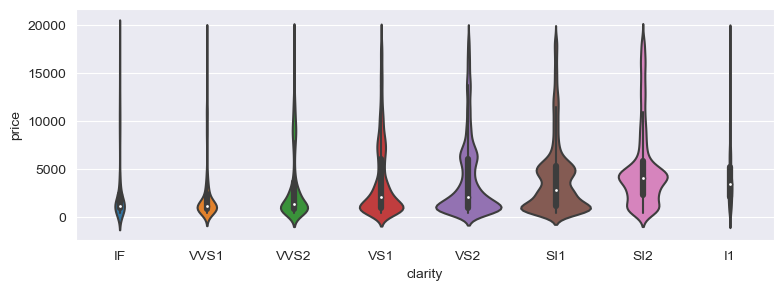

In [49]:
plt.figure(figsize=(9,3))
sns.violinplot(df_eda, x='clarity', y='price', order=['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'] , scale='count');

df_eda['clarity'].value_counts()

From the above, we can see that our dataset does not contain an equal number of diamonds per **clarity** grade. This may well result in the model we create being better at predicting the price of diamonds with a certain clarity than others. Interestingly, the price of 'I1' clarity graded diamonds (i.e. the worst) appears (on average) to be more than the price of 'IF' clarity graded diamonds (i.e. the best). Again, this is likely due to the fact that the average weight of 'I1' clarity graded diamonds in our dataset is more than that of 'IF' clarity graded diamonds. Lets check to see whether this is true.

In [50]:
df_eda.groupby('clarity')[['carat', 'price']].mean()

,carat,price
clarity,,
I1,1.283940,3929.411685
IF,0.505536,2870.270892
SI1,0.849925,3992.351295
SI2,1.075981,5054.138536
VS1,0.727086,3839.722707
VS2,0.763778,3923.633669
VVS1,0.503418,2521.819879
VVS2,0.596432,3285.179497


As we suspected, the average weight of 'I1' clarity graded diamonds is much greater than the average weight of 'IF' clarity graded diamonds.

#### Balancing the Dataset:
Across all three categorical features (**cut**, **color** and **clarity**) of our dataset, there exists an unbalanced distribution of diamonds. In addition to this, the categorical features combine to form 280 (8 x 5 x 7) unique categorical combinations to which a diamond in our dataset can belong. It is thus very unlikely that we will have enough diamonds to create a balanced dataset. Nonetheless, lets take a look at how many diamonds there are per the 280 categorical combinations in our dataset.

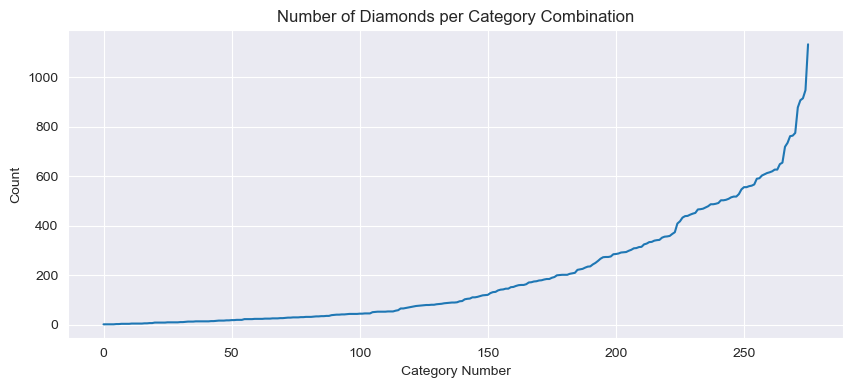

In [51]:
diamonds_per_category = pd.DataFrame()
diamonds_per_category['diam_count'] = df_eda.groupby(['cut', 'color', 'clarity'], as_index=False).count()['carat']
cat_num = diamonds_per_category.shape[0]

plt.figure(figsize=(10,4))
sns.lineplot(diamonds_per_category.sort_values('diam_count'), x= range(0,cat_num), y='diam_count')
plt.title('Number of Diamonds per Category Combination')
plt.xlabel('Category Number')
plt.ylabel('Count');

As we suspected, there simply isn't enough diamonds across all the 280 categories to create a balanced dataset, thus we will simply have to make do with an unbalanced dataset.

#### Remove the Outliers From the Dataset

In [52]:
# Create a copy of our dataset to remove outliers from
df_clean = df_eda.copy()

In [53]:
outlier_list = list(set(depth_outliers).union(set(table_outliers)).union(set(l_w_ratio_outliers)))

df_clean = df_clean.drop(outlier_list, axis= 0)

####  Check size of our dataframe after Exploratory Data Analysis and Preprocessing

In [54]:
#  Check size of dataframe after Exploratory Data Analysis and Preprocessing
cd_size = round(100 * df_clean.shape[0] / diam_df.shape[0], 2)

print(f"Number of outliers removed from the dataset: {df_eda.shape[0] - df_clean.shape[0]}.")
print(f"Total number of diamonds removed from the dataset: {diam_df.shape[0] - df_clean.shape[0]}.")
print(f"Current number of diamonds in dataset: {df_clean.shape[0]}.")
print(f"Size of current dataset relative to original dataset: {cd_size}%")

Number of outliers removed from the dataset: 7.
Total number of diamonds removed from the dataset: 244.
Current number of diamonds in dataset: 53696.
Size of current dataset relative to original dataset: 99.55%


### Dummy Variables:

In [55]:
# Creae a copy of our dataset to which we can add dummy variables to.
df_get_dummies = df_clean.copy()

There are 3 categorical features (**cut**, **clarity**, **color**), all three of which are ordered. Let's create dummy variables for each feature using ordinal encoding.

**Note:** One hot encoding would likely produce a model better able to predict the price of diamonds than ordinal encoding will. However, ordinal encoding should still produce a good model and require significantly less computational power than one hot encoding.

In [56]:
cut_dict = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
color_dict = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
clarity_dict = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

df_get_dummies['cut'] = df_get_dummies['cut'].map(cut_dict)
df_get_dummies['color'] = df_get_dummies['color'].map(color_dict)
df_get_dummies['clarity'] = df_get_dummies['clarity'].map(clarity_dict)

In [57]:
#  check that ordinal encoding worked
df_get_dummies.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,l_w_ratio
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43,0.992
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31,1.013
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31,0.995
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63,0.993
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75,0.998


In [58]:
# Create a copy of our now cleaned and preprocessed dataset to create models with
processed_data = df_get_dummies.copy()

## Regression Models

### The Models:
1. Linear Regression 
2. KNeighbours Regression
3. DecisionTree Regression
4. XGBoost Regression
5. HistGBoost Regression

### Methodology:

- Split the processed data into train(75%) and test (25%) datasets.
- Define the 5 unrefined regression models and build a pipeline of standard scalar and model.
- Get the negative root mean square error of the 5 unrefined models using cross validation and save them to a dictionary.
- Refine all five regression models and update their parameters, as well as record the (computational) time required to refine each model.
- Get the negative root mean square error of the 5 refined models using cross validation and save them to a dictionary.
- Create a dataframe of the performance of the 5 unrefined and refined regression models and evaluate.
- Use the best performing model to predict the price of diamonds in the test dataset and evaluate the models performance.

### Train and Test Data

In [59]:
# y will be the target, and X the features
y = processed_data['price']
X = processed_data.drop(['price'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Initial Models

### Pipelines

In [60]:
# Define the 5 regression models
ln_reg = LinearRegression()
knn_reg = KNeighborsRegressor()
dt_reg = DecisionTreeRegressor()
xgb_reg = XGBRegressor()
hgb_reg = HistGradientBoostingRegressor()

# Define a StandardScaler
std_scaler = StandardScaler()

# Build pipelines of standard scaler and model
p_line_ln = Pipeline([('scalar_1', std_scaler), ('ln', ln_reg)])
p_line_knn = Pipeline([('scalar_2',  std_scaler), ('knn', knn_reg)])
p_line_dt = Pipeline([('scalar_3',  std_scaler), ('dt', dt_reg)])
p_line_xgb = Pipeline([('scalar_4', std_scaler), ('xgb', xgb_reg)])
p_line_hgb = Pipeline([('scalar_5', std_scaler), ('hgb', hgb_reg)])

# Create a list of all the pipelines
pipelines = [p_line_ln, p_line_knn, p_line_dt, p_line_xgb, p_line_hgb]

# List of pipeline names
model_names = ['Linear', 'KNeighbors', 'DecisionTree', 'XGBoost','HistGBoost']

#  Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

### Cross Validation of Unrefined Models:

In [61]:
unref_model_errors = {}

for i, model in enumerate(pipelines):
    cv_score = -round(cross_val_score(model, X_train, y_train,scoring="neg_root_mean_squared_error", cv=10).mean(), 2)
    unref_model_errors[model_names[i]] = cv_score
    print(f"{1 + i}. {model_names[i]} Regression Neg_RMSE: ${cv_score}")

1. Linear Regression Neg_RMSE: $1192.29
2. KNeighbors Regression Neg_RMSE: $752.93
3. DecisionTree Regression Neg_RMSE: $746.26
4. XGBoost Regression Neg_RMSE: $535.55
5. HistGBoost Regression Neg_RMSE: $527.18


## Refined Models

In [62]:
# Create a dictionary to store the time required to refine each model.
gs_times = {}

### 1. Linear Regression
To refine the Linear regression model, I will use sklearn's PolynomialFeatures. PolynomialFeatures will help account for the exponential relationship observed between a diamond's price and many of its features (eg. carat, x, y, etc.), as well as the effect of two or more features occuring together. (Note: We won't go above a value of 3 for the 'degree' parameter).

In [63]:
start_time = time()

magnitude = 1
interaction = True
error = unref_model_errors['Linear']

# perform a custom gridsearch
for j in [True, False]:
    for i in range(1, 4):
        poly = PolynomialFeatures(interaction_only=j, degree=i)
        poly_X_train = poly.fit_transform(X_train)
        cv_score = -cross_val_score(ln_reg, poly_X_train, y_train, scoring="neg_root_mean_squared_error", cv=3).mean()
        if cv_score < error:
            magnitude = i
            error = cv_score
            interaction = j

p_line_ln = Pipeline([('scalar_1', PolynomialFeatures(interaction_only=interaction, degree=magnitude)), ('ln', ln_reg)])

elapsed_time = round((time() - start_time), 2)
gs_times[model_names[0]] = elapsed_time

print(f"LinearRegression, PolynomialFeatures best parameters: (interaction_only={interaction}, degree={magnitude})")
print(f"Elapsed time: {elapsed_time} seconds")

LinearRegression, PolynomialFeatures best parameters: (interaction_only=False, degree=3)
Elapsed time: 3.04 seconds


### 2. KNeighbors Regression
The performance of a KNeighbors regression model can be improved by altering the 'n_neighbors' and 'weights' parameter used to fit the model. Using a different scaler can also help improve performance, as well as only using select features as predictors for the target(in this case the price). often, the featuers most correlated to the target are the best ones to keep as predictors, whilst the least correlated ones are usually the ones to drop. Let's re-examine the correlation of each of the features with price.

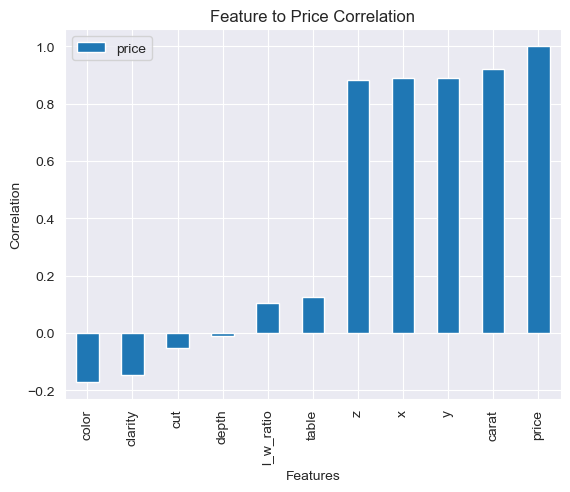

In [64]:
processed_data.corr()[['price']].sort_values('price').plot.bar()
plt.title('Feature to Price Correlation')
plt.xlabel('Features')
plt.ylabel('Correlation');

From the above plot, we can see that there are several features in our dataset that have little to no correlation with the price of a diamond, while there are others that have a high correlation. 

Using a gridsearch, let's first determine the best values for the parameters 'n_neighbors' and 'weights' for a KNeighbors model using a StandardScaler, as well as all the features as predictors for the target. Let's then examine which features, when not used as predictors for the target, result in this model performing better. Having determined which features detract from the model's performance, let's drop these features from our training dataset. Let's then perform a gridsearch across 4 different scalers (see below) to determine the final scaler, and associated 'n_neighbors' and 'weights' we ought to use for the refined Kneighbors model.

The different scalers we will examine are: sklearn's StandardScaler, MinMaxScaler, RobustScaler and MaxAbsScaler.

In [65]:
start_time = time()

# 1. Perform a gridsearch to find the best parameters for a model using standard scaling and all the features in the train set
params = {'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
            'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(knn_reg, param_grid=params, verbose=0, scoring="neg_root_mean_squared_error", cv=3)
knn_grid.fit(std_scaler.fit_transform(X_train), y_train)
knn_reg = knn_grid.best_estimator_
p_line_knn = Pipeline([('scalar_2', std_scaler), ('knn', knn_reg)])
error_1= -knn_grid.best_score_

# 2. Find the best features to use to predict the price of round cut diamonds
features= list(X_train.columns.values)
knn_kept_features = []
knn_dropped_features = []

for feat in features:
    cv_score = -cross_val_score(p_line_knn, X_train.drop(feat, axis=1), y_train, cv=3,
                            scoring='neg_root_mean_squared_error').mean()
    if cv_score > error_1:
        knn_kept_features.append(feat)
    else:
        knn_dropped_features.append(feat) 

# 3. Find the best scaler and parametes to use for the updated feature list
scaler_list =[StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler]

for scale in scaler_list:
    scaler = scale()
    knn_grid = GridSearchCV(knn_reg, param_grid=params, verbose=0, scoring="neg_root_mean_squared_error", cv=10)
    knn_grid.fit(scaler.fit_transform(X_train[knn_kept_features]), y_train)
    error_2 = -knn_grid.best_score_
    if error_1 > error_2:
        knn_reg_refined= knn_grid.best_estimator_
        knn_scaler= scaler
        error_1 = error_2

p_line_knn = Pipeline([('scalar_2', knn_scaler), ('knn', knn_reg_refined)])

elapsed_time = round((time() - start_time), 2)
gs_times[model_names[1]] = elapsed_time

print(f"Dropped Features: {knn_dropped_features}.\nKept Features: {knn_kept_features}.")
print(f"scaler: {knn_scaler}")
print(f"{knn_reg_refined}")
print(f"Total elapsed time: {elapsed_time} seconds.")

Dropped Features: ['cut', 'depth', 'table', 'l_w_ratio'].
Kept Features: ['carat', 'color', 'clarity', 'x', 'y', 'z'].
scaler: RobustScaler()
KNeighborsRegressor(n_neighbors=10, weights='distance')
Total elapsed time: 246.95 seconds.


### 3. DecisionTree Regression

Let's perform a grid search to refine the DecisionTree Regression model. We will look at 1024 combinations (4 x 2 x 4 x 4 x 4 x 2) across 6 parameters.

In [66]:
start_time = time()

params = {'max_depth': [13, 15, 17, None],
          'max_features': [5, 10],
          'max_leaf_nodes': [None, 1500, 1800, 2100],
          'min_samples_leaf': [3, 4, 5, 6],
          'min_samples_split': [13, 16, 20, 24],
          'splitter': ['best', 'random']}

dt_grid = GridSearchCV(dt_reg, param_grid=params, verbose=0, scoring="neg_root_mean_squared_error", cv=3)
dt_grid.fit(std_scaler.fit_transform(X_train), y_train) 
dt_reg = dt_grid.best_estimator_  
p_line_dt = Pipeline([('scalar_3', std_scaler), ('dt', dt_reg)])

elapsed_time = round((time() - start_time), 2)
gs_times[model_names[2]] = elapsed_time

print(f"{dt_reg}")
print(f"Elapsed time: {elapsed_time} seconds.")

DecisionTreeRegressor(max_depth=15, max_features=10, max_leaf_nodes=1500,
                      min_samples_leaf=3, min_samples_split=16,
                      splitter='random')
Elapsed time: 327.74 seconds.


### 4. XGBoost Regression

**Note**: Unfortunately, I was unable to perform a truly comprehensive gridsearch for either the **XGBoost**, or the **HistGBoost** regression models, as my personal computer kept crashing whenever I attempted to perform a full scale gridsearch. Nonetheless, I was able to refine the two models by performing numerous small scale trial and error gridsearches across a select set of model specific parameters - see the cells below for the final iteration of the gridsearches used to refine the last 2 remaining regression models.

To obtain the time it would take to perform a gridsearch across 256 (eg. 4 x 4 x 4 x 4) parameter combinations for an **XGBoost** regression model (a small numbered compared to the 1024 combinations looked at to refine the DecisionTree regression model), I multiplied the average time to perform a gridsearch across one combination by 256 - see below.

In [67]:
start_time = time()

params = {'learning_rate': [0.03, 0.04],
          'max_depth': [7, 8],
          'n_estimators': [300, 350],
          'min_child_weight': [8, 9]}

xgb_grid = GridSearchCV(xgb_reg, param_grid=params, verbose=0, scoring="neg_root_mean_squared_error", cv=3)
xgb_grid.fit(std_scaler.fit_transform(X_train), y_train) 
xgb_reg = xgb_grid.best_estimator_  
p_line_xgb = Pipeline([('scalar_4', std_scaler), ('xgb', xgb_reg)])

elapsed_time = round((time() - start_time) * 256 / 16, 2)
gs_times[model_names[3]] = elapsed_time 

print(f"{xgb_reg}")
print(f"Elapsed time Estimate: {elapsed_time} seconds.")

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
Elapsed time Estimate: 4855.09 seconds.


### 5. HistGBoost Regression

To obtain the time it would take to perform a gridsearch across 576 (eg. 4 x 4 x 3 x 3 x 4) parameter combinations for a **HistGBoost** regression model (+-56% of the number of combinations examined to refine the DecisionTree regression model), I multiplied the average time to perform a gridsearch across one combination by 576 - see below.

In [68]:
start_time = time()

params = {'max_depth': [7, None],
          'learning_rate': [0.04, 0.05],
          'max_iter': [300, 350],
          'max_leaf_nodes': [38, 41],
          'min_samples_leaf': [14, 16]}
    
hgb_grid = GridSearchCV(hgb_reg, param_grid=params, verbose=0, scoring="neg_root_mean_squared_error", cv=3)
hgb_grid.fit(std_scaler.fit_transform(X_train), y_train)
hgb_reg = hgb_grid.best_estimator_
p_line_hgb = Pipeline([('scalar_5', std_scaler), ('hgb', hgb_reg)])

elapsed_time = round((time() - start_time) * 576 / 32, 2)
gs_times[model_names[4]] = elapsed_time

print(f"{hgb_reg}")
print(f"Elapsed Time Estimate: {elapsed_time} seconds.")

HistGradientBoostingRegressor(learning_rate=0.05, max_depth=7, max_iter=300,
                              max_leaf_nodes=41, min_samples_leaf=14)
Elapsed Time Estimate: 4150.65 seconds.


### Cross Validation of Refined Models:

In [69]:
pipelines = [p_line_ln, p_line_knn, p_line_dt, p_line_xgb, p_line_hgb]
ref_model_errors = {}

for i, model in enumerate(pipelines):
    if model == p_line_knn:
        cv_score = -round(cross_val_score(model, X_train[knn_kept_features], y_train, scoring="neg_root_mean_squared_error",
                                          cv=10).mean(), 2)
    else:   
        cv_score = -round(cross_val_score(model, X_train, y_train,scoring="neg_root_mean_squared_error", cv=10).mean(), 2)

    ref_model_errors[model_names[i]] = cv_score
    print(f"{1 + i}. {model_names[i]} Regression Neg_RMSE: ${cv_score}")

1. Linear Regression Neg_RMSE: $617.09
2. KNeighbors Regression Neg_RMSE: $563.33
3. DecisionTree Regression Neg_RMSE: $628.14
4. XGBoost Regression Neg_RMSE: $511.88
5. HistGBoost Regression Neg_RMSE: $520.97


### Unrefined vs Refined Model Evaluation/Comparison

In [70]:
# Create a dataframe of unrefined and refined model performance
error_df = pd.DataFrame(data=model_names, columns=['regression_model'])
error_df['unrefined_model_NRMSE'] = error_df.regression_model.map(unref_model_errors)
error_df['refined_model_NRMSE'] = error_df.regression_model.map(ref_model_errors)
error_df['error_reduction_NRMSE'] = error_df.unrefined_model_NRMSE - error_df.refined_model_NRMSE
error_df['refinement_time_sec'] = error_df.regression_model.map(gs_times)
error_df

,regression_model,unrefined_model_NRMSE,refined_model_NRMSE,error_reduction_NRMSE,refinement_time_sec
0,Linear,1192.29,617.09,575.20,3.04
1,KNeighbors,752.93,563.33,189.60,246.95
2,DecisionTree,746.26,628.14,118.12,327.74
3,XGBoost,535.55,511.88,23.67,4855.09
4,HistGBoost,527.18,520.97,6.21,4150.65


Lets visualize the performance of the unrefined and refined versions of the 5 regression models using a bar plot. Let's also plot the reduction in error achieved by the refined verion of each model on the same plot. Under that, let's plot the time taken to refine each of the 5 regression models.

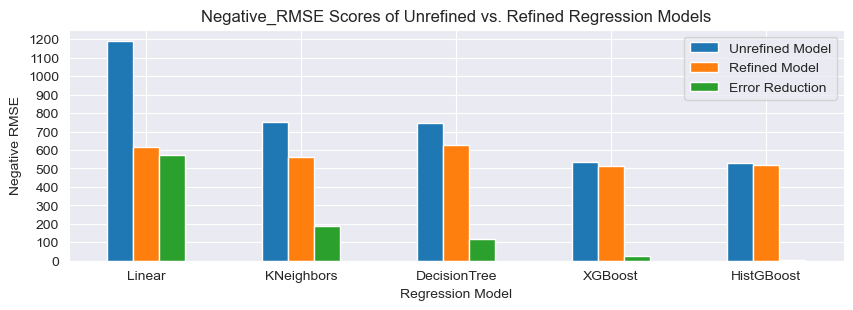

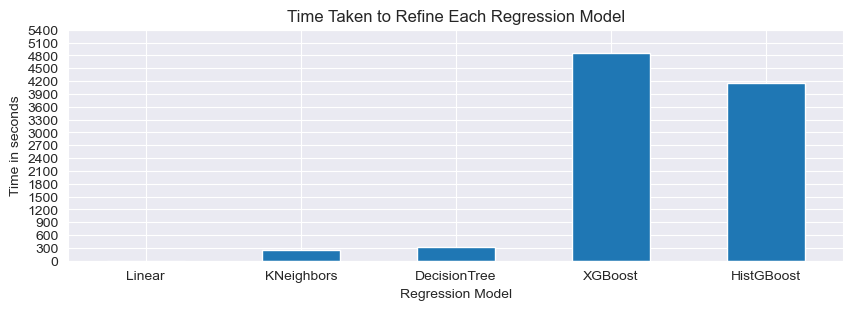

In [71]:
error_df[['regression_model','unrefined_model_NRMSE','refined_model_NRMSE', 'error_reduction_NRMSE']].plot.bar(x='regression_model',rot=0,figsize=(10,3))
plt.legend(['Unrefined Model', 'Refined Model', 'Error Reduction'])
plt.title('Negative_RMSE Scores of Unrefined vs. Refined Regression Models')
plt.ylabel('Negative RMSE')
plt.xlabel('Regression Model')
plt.yticks(ticks=[100*i for i in range(13)]);

t_range= int(error_df.refinement_time_sec.max()//300) + 3
error_df[['regression_model','refinement_time_sec']].plot.bar(x='regression_model', rot=0, legend=False, figsize=(10,3))
plt.title('Time Taken to Refine Each Regression Model')
plt.ylabel('Time in seconds')
plt.xlabel('Regression Model')
plt.yticks(ticks=[300*i for i in range(t_range)]);

### Discussion

There is much to be gleaned from the above plots regarding the 5 regression models examined in this investigation. 

First of all, it's clear that the performance of unrefined Linear, KNeighbors and DecisionTree regression models provides a poor estimate of the performance of the refined versions of these models (at least in the context of the 'Diamonds' dataset). However, the opposite is true of both the XGBoost and HistGBoost regression models, whose unrefined versions performed only a little worse than their refined versions.

Secondly, it's clear that the amount of time required to refine the different regression models differs greatly, with only 3 seconds of computational time required to refine the Linear model, compared to the four to five minutes required to refine the KNeighbors and DecisionTree models, and finally the hour plus required to refine the XGBoost and HistGBoost models. In general, the trend seems to be that the bettter the performance of the initial/unrefined version of a model, the longer it takes to refine that model, and the smaller the improvement in the performance of the refined version over that of the unrefined version will be.

Thirdly, it's clear that the best performing unrefined regression model will not always be the best performing regression model once all the models have been refined. In fact, out of the 5 regression models examined, not one retained it's relative ranking once refined - see below.

Best Performing Unrefined Regression Model:
1. HistGBoost Neg_RMSE: \\$527.18	
2. XGBoost Neg_RMSE: \\$535.55	
3. DecisionTree Neg_RMSE: \\$746.26
4. KNeighbors Neg_RMSE: \\$752.93	
5. Linear Neg_RMSE: \\$1192.29	

Best Performing Refined Regression Model:
1. XGBoost Neg_RMSE: \\$511.88	
2. HistGBoost Neg_RMSE: \\$520.97	
3. KNeighbors Neg_RMSE: \\$563.33		
4. Linear Neg_RMSE: \\$617.09	
5. DecisionTree Neg_RMSE: \\$628.14	

Fourthly, once refined, every model was able to achieve a negative RMSE score of no greater than 23% of that of the best performing (refined) regression model. Thus, it is fair to say that every regression model examined was competitive and also comparable with final model chosen (XGBoost), and that no model warranted exclusion from this investigation.

**Take aways:** Although this has been a very limited investigation, examining the performance of merely 5 different regression models across a single dataset, I believe it fair to say that using the unrefined performance of different regression models is by no means a foolproof way of finding the best regression model to refine and use in a given situation. That said, fully refining a large number of different regression models in order to determine which is the best performing one is not a viable solution either. Instead, I would suggest the following approach with regards finding the best regression model to refine and use in a given situation:

Firstly, fit, assess and record the performance of all the unrefined regression models to be examined. Secondly, perform a partial refinement of all the unrefined regression models and reassess and record their performance, as well as take note of the time required to partially refine each model. Finally, compare the performance of the partially refined models, as well as use the insights gained into each model during the partial refinement process to select which regression you ought to fully refine and use as the final model. (Note: This approach won't guarantee that the best model will always end up being selected for refinement, but at the very least it will allow for a much more educated decision to be made.)

**Note** Partially refining each regression model will not only make it more competitive, but will provide us with a much better estimate of the fully refined version's performance, as well as allow us to better gauge the time it would take to fully refine each regression model within a given context. As an example of this, as well as what is meant by a partial refinement, I have included below (as an example) a partial refinement of the KNeighbors Regression Model performed within the context of the 'Diamonds' dataset.

### e.g. Partial Refinement of a KNeighbors Model
To partially refine the Kneighbors model, we will simply attempt to determine which features we ought to use as predictors for the price of a diamond. We won't try to find the optimum number of neighbors to use, or the best 'weights' parameter, or the best scaler.

In [84]:
start_time = time()

p_line_ex =  Pipeline([('scalar', StandardScaler()), ('knn', KNeighborsRegressor())])

error = unref_model_errors['KNeighbors']
features= list(X_train.columns.values)
knn_kept_features = []

for feat in features:
    cv_score = -cross_val_score(p_line_ex, X_train.drop(feat, axis=1), y_train, cv=3,
                            scoring='neg_root_mean_squared_error').mean()
    if cv_score > error:
        knn_kept_features.append(feat)
        
elapsed_time = round((time() - start_time), 2)
cv_score = -round(cross_val_score(p_line_ex, X_train[knn_kept_features], y_train, cv=5,
                            scoring='neg_root_mean_squared_error').mean(), 2)

print(f"Kept Features: {knn_kept_features}.")
print(f"Unrefined Model Neg_RMSE: ${unref_model_errors['KNeighbors']}")
print(f"Partialy Refined Model Neg_RMSE: ${cv_score} - (Time taken: {elapsed_time} seconds).")
print(f"Refined KNeighbors Model Neg_RMSE: ${ref_model_errors['KNeighbors']} - (Time taken: {gs_times['KNeighbors']} seconds).")

Kept Features: ['carat', 'color', 'clarity', 'x', 'y', 'z'].
Unrefined Model Neg_RMSE: $752.93
Partialy Refined Model Neg_RMSE: $589.88 - (Time taken: 20.69 seconds).
Refined KNeighbors Model Neg_RMSE: $563.33 - (Time taken: 246.95 seconds).


The partially refined KNeighbors model took a mere +-20 seconds to refine (+-8\% of the time required to refine the fully refined version), and was able to achieve a negative RMSE score only \\$26.55 (+-4.7\%) more than the refined version. 

The performance of the partially refined KNeighbors model provides us with a much better estimate of what the performance of the fully refined version of the model might be, and allows us to more fairly compare it with regression models like XGBoost and HistGBoost, whose unrefined versions generally perform little worse than their refined version.

## Testing the Best Performing Model (XGBoost) on the Test Data

### Model Evaluation

In [73]:
predicted_price = np.round(p_line_xgb.predict(X_test), 0)
print("XGB Regression:")
print(f"Adjusted R^2: {round(1 - (1-p_line_xgb.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1), 4)}")
print(f"RMSE: {round(mean_squared_error(y_test, predicted_price), 2)}")
print(f"RMSE: ${round(np.sqrt(mean_squared_error(y_test, predicted_price)), 2)}")
print(f"MAE: ${round(mean_absolute_error(y_test, predicted_price), 2)}")

XGB Regression:
Adjusted R^2: 0.9837
RMSE: 254069.64
RMSE: $504.05
MAE: $254.96


When run on the test data, the final model was able to achieved a RMSE score of \\$504.05 - almost \\$26 less than the \\$530 target stated at the begining of the investigation - this is excellent! Let's create a dataframe called residuals that contains all the features and targets of diamonds in our test dataset, as well as each ones predicted price.

In [74]:
# Create the residuals dataframe
residuals = X_test.copy()
residuals['price'] = y_test
residuals['pred_price'] = predicted_price
residuals['price_diff'] = residuals.pred_price - residuals.price

In [75]:
residuals.head()

,carat,cut,color,clarity,depth,table,x,y,z,l_w_ratio,price,pred_price,price_diff
8454,1.01,4,1,2,62.5,56.0,6.40,6.44,4.01,0.994,4413,4672.0,259.0
1184,0.71,4,3,6,61.7,57.0,5.75,5.70,3.53,1.009,2930,3321.0,391.0
30184,0.31,4,5,4,61.2,55.0,4.40,4.43,2.70,0.993,722,763.0,41.0
29067,0.40,2,5,2,63.0,57.0,4.65,4.68,2.94,0.994,687,711.0,24.0
1225,0.70,2,4,5,62.6,59.0,5.60,5.64,3.52,0.993,2940,3133.0,193.0


Lets look at the descriptive statistics of the residuals dataframe.

In [76]:
round(residuals.describe(),2)

,carat,cut,color,clarity,depth,table,x,y,z,l_w_ratio,price,pred_price,price_diff
count,13424.00,13424.00,13424.00,13424.00,13424.00,13424.00,13424.00,13424.00,13424.00,13424.00,13424.00,13424.00,13424.00
mean,0.79,2.91,3.42,3.06,61.75,57.46,5.73,5.73,3.54,1.00,3907.65,3906.21,-1.44
std,0.47,1.12,1.70,1.64,1.40,2.23,1.11,1.11,0.69,0.01,3953.60,3922.56,504.07
min,0.20,0.00,0.00,0.00,51.00,43.00,3.73,3.68,2.24,0.96,326.00,308.00,-6037.00
25%,0.40,2.00,2.00,2.00,61.10,56.00,4.71,4.72,2.91,0.99,945.00,939.00,-101.00
50%,0.70,3.00,3.00,3.00,61.80,57.00,5.69,5.71,3.53,1.00,2401.00,2429.50,6.00
75%,1.04,4.00,5.00,4.00,62.50,59.00,6.53,6.52,4.03,1.01,5263.25,5238.00,91.00
max,4.13,4.00,6.00,7.00,71.30,79.00,10.00,9.85,6.43,1.05,18823.00,18631.00,5225.00


#### Plot of Actual Price vs Predicted Price

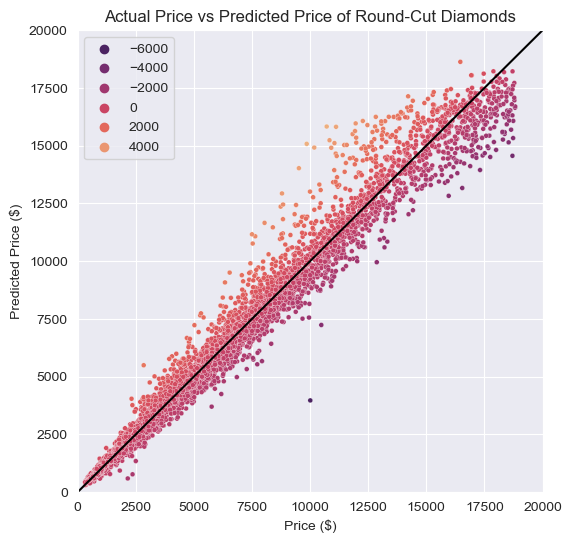

In [77]:
plt.figure(figsize=(6,6))
sns.scatterplot(residuals, x='price', y='pred_price', hue='price_diff', palette='flare_r', linewidth=0.2, s=50, marker='.')
sns.lineplot(x=(0,20000), y=(0,20000), color='black')
plt.xlim(0,20000)
plt.ylim(0,20000)
plt.title('Actual Price vs Predicted Price of Round-Cut Diamonds')
plt.xlabel('Price ($)')
plt.ylabel('Predicted Price ($)');

The above plot provides us with a visualization of the performance/ability of the final model to predict the price of round-cut diamonds. The sheer density of the plot makes it difficult to assess just how well the model is performing, but for the most part it appears to be doing fairly well. However, there are a several very poor predictionspoor, as well as a few potential trends that are worth taking a closer look at. Lets take a closer look by plotting the difference in price against the actual price of a diamond.

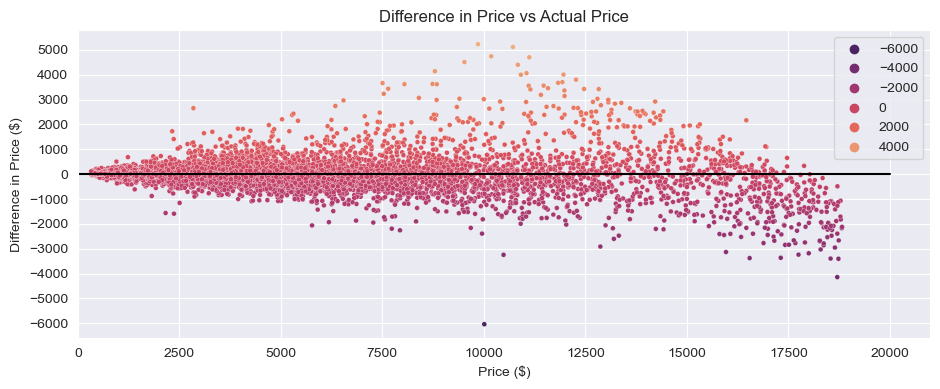

In [78]:
plt.figure(figsize=(11,4))
sns.scatterplot(residuals, x='price', y='price_diff', hue='price_diff', palette='flare_r', linewidth=0.2, s=50, marker='.')
sns.lineplot(x=(0,20000), y=(0,0), color='black')
plt.yticks(ticks=[1000*i for i in range(-6,6)]);
plt.title('Difference in Price vs Actual Price')
plt.ylabel('Difference in Price ($)')
plt.xlabel('Price ($)')
plt.xlim(0,21000);

It would appear that the average absolute difference in the predicted and actual price increases as the price of diamonds increases. This is difficult to say for certain though given the density of the plot. What can be said for certain though, is that the model has a tendency to under predict the price of diamonds whose actual price exceeds \\$15000, and is almost guaranteed to under predict the price of any diamond greater than \\$17500. 

In terms of poor predictions, the very worst offenders (in terms of price difference) occur around the \\$10000 price mark. Lets take a look at the very worst offender that has a difference in price of < \\$-6000.

In [79]:
residuals[residuals.price_diff < -6000]

,carat,cut,color,clarity,depth,table,x,y,z,l_w_ratio,price,pred_price,price_diff
21935,1.01,0,6,1,64.6,58.0,6.25,6.2,4.02,1.008,10011,3974.0,-6037.0


Let's compare this diamond with other diamonds (from the original dataset) that have the same cut, color, clarity and weight as it does.

In [80]:
processed_data[(processed_data.cut == 0) & (processed_data.color == 6) & (processed_data.clarity == 1)
               & (processed_data.carat == 1.01)].sort_values('price', ascending=False)

,carat,cut,color,clarity,depth,table,price,x,y,z,l_w_ratio
21935,1.01,0,6,1,64.6,58.0,10011,6.25,6.20,4.02,1.008
9145,1.01,0,6,1,64.6,62.0,4538,6.26,6.21,4.03,1.008
7310,1.01,0,6,1,65.3,55.0,4205,6.33,6.19,4.09,1.023
5605,1.01,0,6,1,64.7,57.0,3871,6.31,6.27,4.07,1.006
1554,1.01,0,6,1,64.6,56.0,3003,6.31,6.24,4.05,1.011


It's immediately obvious that this particular diamond is an anomaly within the dataset with it being double the price of the next most expensive diamond that has the same 4C's values as it. What has most likely happened is that either the price of this particular diamond has been misreported or one of its other features has, resulting in its price being under predicted. This may also be true of many of the other diamonds that have a sizeable difference between their actual and predicted price.

#### Check the Distribution of the Differences Between the Actual and Predicted Price

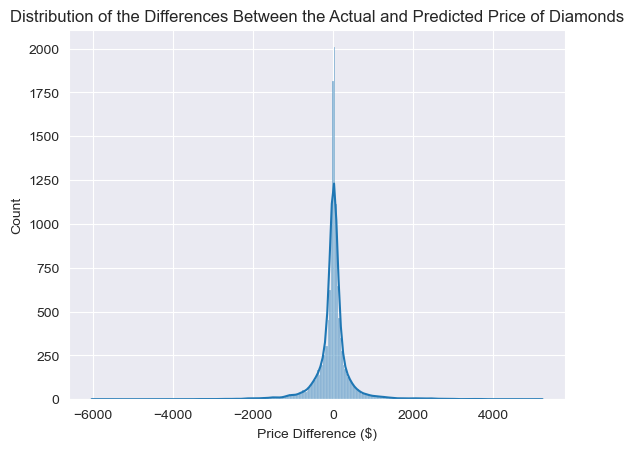

In [81]:
sns.histplot(residuals, x='price_diff', kde=True, bins=300)
plt.title('Distribution of the Differences Between the Actual and Predicted Price of Diamonds')
plt.xlabel('Price Difference ($)');

The differences between the actual and predicted price of diamonds follow a normal distribution and appears to be symmetrical (i.e. not skewed) so that's good.